# Experimenting LinearRegression on the Boston Dataset

In [12]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.datasets import load_boston

boston_dataset = load_boston()

## Examine the description of the Model and create a MarkDown Cell with the relevant information about the features (hint:print the content in boston_dataset.DESCR)


## MEDV is the Target of the Dataset (median value)

In [24]:
import pandas as pd
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston["MEDV"]=boston_dataset.target

In [42]:
boston.corr().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


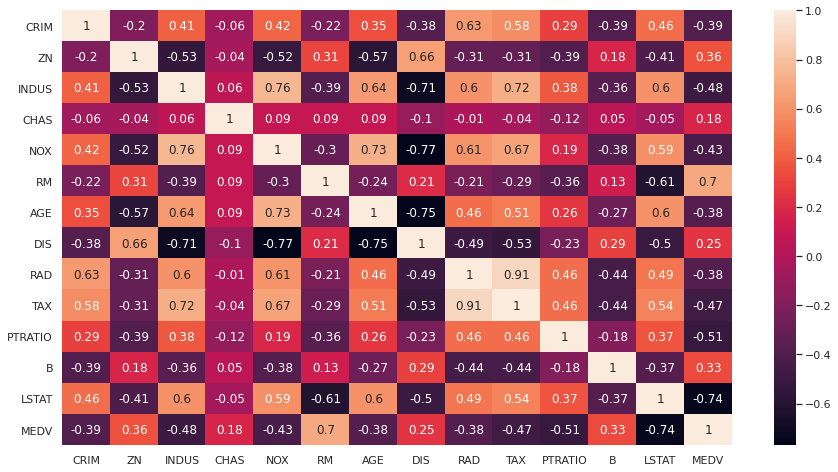

In [26]:
sns.set(rc = {'figure.figsize':(15,8)})

correlation_matrix = boston.corr().round(2)
ax=sns.heatmap(correlation_matrix, annot=True)



## using a Linear regression model requires choosing features that have a high correlation index. Look at the matrix and find the best candidates

## Note that LSTAT has a high negative correlation -0.74 and RM has a high positive corr index (0.7)

## using the scatter matrix plot look closer to the relations existing among the variables, to do so create a new dataframe with just MEDV,RM and LSTAT and use the scatter_matrix plot

In [39]:

mdata=pd.DataFrame({})
boston_focus=boston.drop(columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B'])


array([[<AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>,
        <AxesSubplot:xlabel='MEDV', ylabel='RM'>],
       [<AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>],
       [<AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>,
        <AxesSubplot:xlabel='MEDV', ylabel='MEDV'>]], dtype=object)

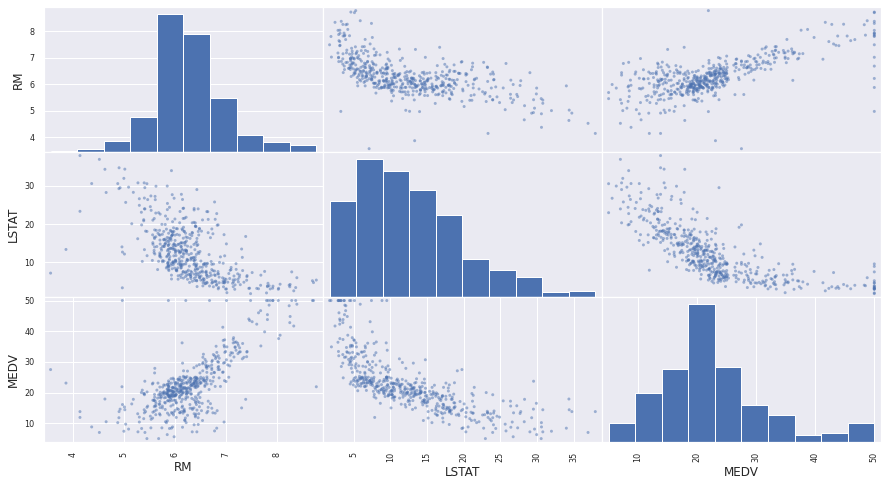

In [40]:
from pandas.plotting import scatter_matrix
scatter_matrix(boston_focus);

## Now it's time to use linear regression with 2 features and one target

In [45]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [50]:
X=np.c_[boston_dataset.data[:,5],boston_dataset.data[:,12]]
y=boston_dataset.target

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lr=LinearRegression()

## Now create a test and train dataset using  train_test_split, using 70% training and 30% testing

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=32)

## Finally train our algorithm and check its score against the test dataset

In [61]:
lr.fit (X_train,y_train)

LinearRegression()

In [62]:
lr.score(X_test,y_test)

0.6156546302984374

## Now test it with a Support Vector Machine Regressor

In [22]:
from sklearn.svm import LinearSVR
svm_reg=LinearSVR(epsilon=0.5,max_iter=10000)
svm_reg.fit(X_train,y_train)
svm_reg.score(X_test,y_test)

0.6148337208647048